# Import necessary libraries

In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix

# Load Dataset

In [169]:
df = pd.read_csv('../data/zeek_preprocessed/combined_features.csv')

# Decision Tree Classifier

#### K-Fold Cross-Validation

In [170]:
# Select features (X) and the target variable (y)
X = df.drop(columns=['is_malicious'])  # Features: all columns except 'label'
y = df['is_malicious']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize K-Fold Cross-Validation
k = 10 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Perform K-Fold Cross-Validation
scores = cross_val_score(dt_classifier, X, y, cv=kf, scoring='accuracy')

# Print the results
print(f'Mean Accuracy: {scores.mean()}')
print(f'Standard Deviation: {scores.std()}')

Mean Accuracy: 0.8511494252873563
Standard Deviation: 0.051139092330954365


#### Without K-Fold Cross-Validation to simplify cells bellow

In [171]:
# Select features (X) and the target variable (y)
X = df.drop(columns=['is_malicious'])  # Features: all columns except 'label'
y = df['is_malicious']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8090


### Classification Report, Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        44
           1       0.82      0.80      0.81        45

    accuracy                           0.81        89
   macro avg       0.81      0.81      0.81        89
weighted avg       0.81      0.81      0.81        89


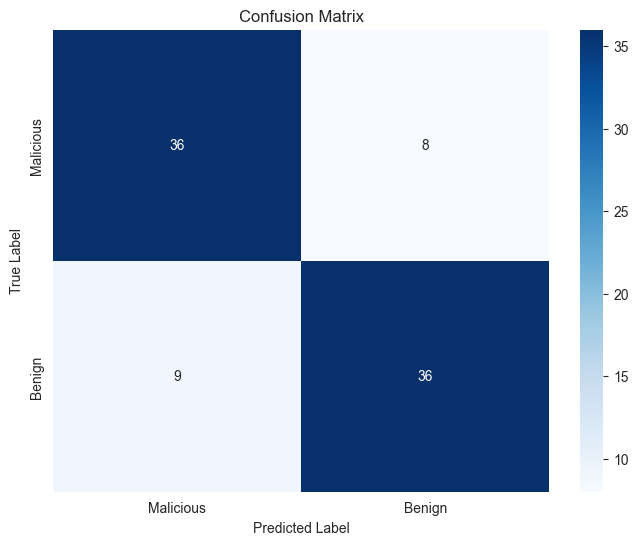

In [172]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Malicious', 'Benign'], 
            yticklabels=['Malicious', 'Benign'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Features importance

                       Feature  Importance
6                     duration    0.460564
7                   conn_state    0.171922
2                    id.orig_p    0.157953
9                resp_ip_bytes    0.055455
11                       query    0.035991
13                        TTLs    0.034059
18                 established    0.032390
5                        proto    0.019296
0                          uid    0.018908
8                orig_ip_bytes    0.013462
1                    id.orig_h    0.000000
3                    id.resp_h    0.000000
4                    id.resp_p    0.000000
10                         rtt    0.000000
14                     version    0.000000
12                     answers    0.000000
15                 server_name    0.000000
16                     resumed    0.000000
17               next_protocol    0.000000
19            cert_chain_fuids    0.000000
20                 trans_depth    0.000000
21                        host    0.000000
22         

<Axes: title={'center': 'Feature Importances'}, xlabel='Feature'>

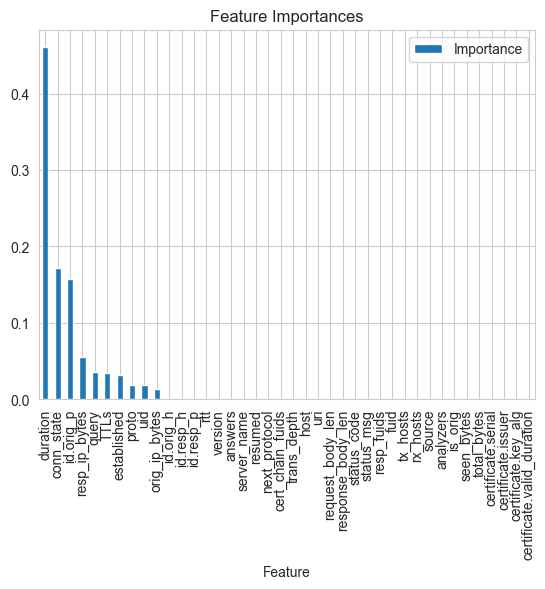

In [173]:
feature_importances = dt_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot
importance_df.plot(kind='bar', x='Feature', y='Importance', title='Feature Importances')

### ROC Curve

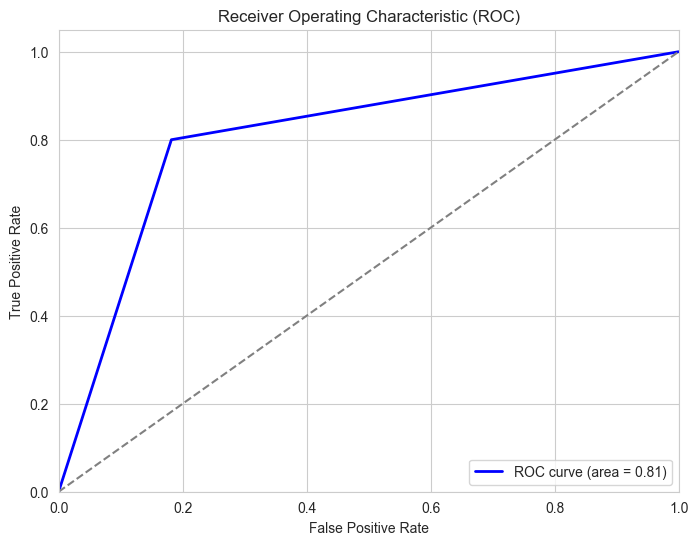

In [174]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()